In [1]:
import numpy as np
import matplotlib.pyplot as plot
from scipy.stats import multivariate_normal

### Метод k ближайших соседей

Генерация данных

In [2]:
data_a = multivariate_normal.rvs(size=150, mean=[0, 3], cov=[[2, 1.5], [1.5, 2]])
data_b = multivariate_normal.rvs(size=200, mean=[2.5, 0], cov=[[2, -0.5], [-0.5, 2]])
x_train = np.vstack([data_a, data_b])
y_train = np.hstack([np.zeros(len(data_a)), np.ones(len(data_b))])

Визуализация данных

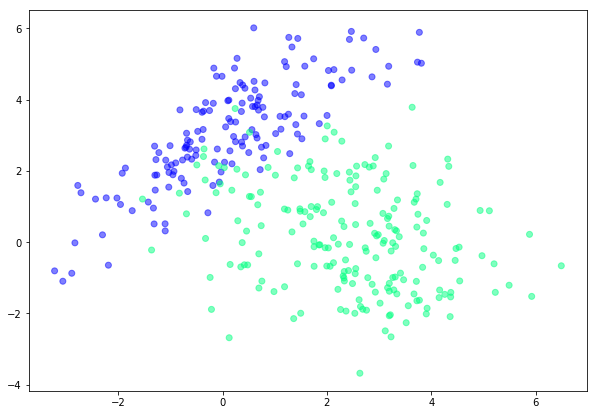

In [3]:
plot.figure(figsize=(10, 7))
plot.scatter(x_train[:, 0], x_train[:, 1], c=y_train, alpha=0.5, cmap='winter')
plot.show()

Генерация тестовой выборки, в 2 раза большей чем обучающая

In [4]:
data_a = multivariate_normal.rvs(size=5*150, mean=[0, 3], cov=[[2, 1.5], [1.5, 2]])
data_b = multivariate_normal.rvs(size=5*200, mean=[2.5, 0], cov=[[2, -0.5], [-0.5, 2]])
x_test = np.vstack([data_a, data_b])
y_test = np.hstack([np.zeros(len(data_a)), np.ones(len(data_b))])

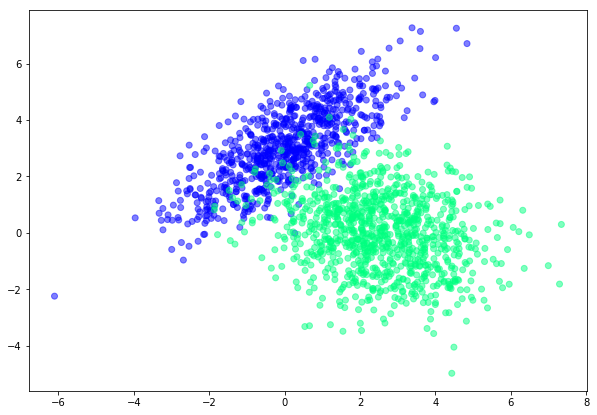

In [5]:
plot.figure(figsize=(10, 7))
plot.scatter(x_test[:, 0], x_test[:, 1], c=y_test, alpha=0.5, cmap='winter')
plot.show()

Обучение модели

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [7]:
# Возвращает обученную на данных модель kNN при k = k_neighbors
def teach_model_k(x_train, y_train, k_neighbors=5):
    model = KNeighborsClassifier(n_neighbors=k_neighbors)
    model.fit(x_train, y_train)
    return model

Подсчет зависимости accuracy в 5-fold cross-validation от k

In [8]:
def compute_cross_val_score(model, x, y):
    k_fold = KFold(5, shuffle=True, random_state=42)
    return cross_val_score(model, x, y, cv=k_fold).mean()

ks = range(1, 100)
accuracy = np.array([compute_cross_val_score(teach_model_k(x_train, y_train, k), x_test, y_test) for k in ks])

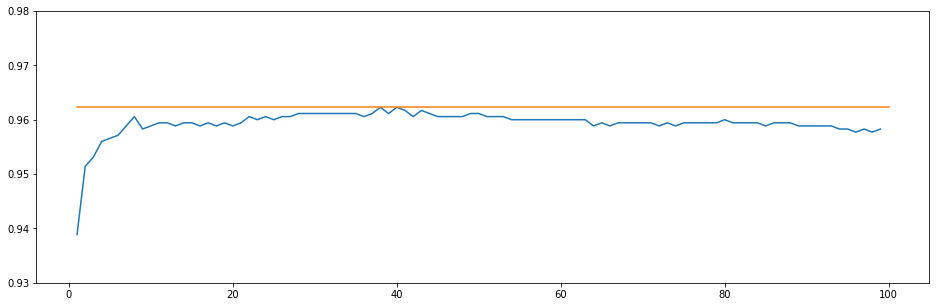

Max score at k=37


In [9]:
plot.figure(figsize=(16, 5))
plot.plot(ks, accuracy)
plot.plot([1, 100], [accuracy.max(), accuracy.max()])
plot.ylim((0.93, 0.98))
plot.show()
print "Max score at k=%d" % (accuracy.argmax())

K, для которого достигается максимум cross-validation score меняется от выборки к выборке, однако score всегда быстро возрастает на первых 3-5-10 значениях k.